In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pneumonia/New folder (2)/valid/PNEUMONIA/VIRUS-9624424-0002.jpeg
/kaggle/input/pneumonia/New folder (2)/valid/PNEUMONIA/VIRUS-9815549-0001.jpeg
/kaggle/input/pneumonia/New folder (2)/valid/PNEUMONIA/BACTERIA-743788-0002.jpeg
/kaggle/input/pneumonia/New folder (2)/valid/PNEUMONIA/VIRUS-9527033-0002.jpeg
/kaggle/input/pneumonia/New folder (2)/valid/PNEUMONIA/VIRUS-9464756-0002.jpeg
/kaggle/input/pneumonia/New folder (2)/valid/PNEUMONIA/VIRUS-9650028-0001.jpeg
/kaggle/input/pneumonia/New folder (2)/valid/PNEUMONIA/BACTERIA-391346-0001.jpeg
/kaggle/input/pneumonia/New folder (2)/valid/PNEUMONIA/BACTERIA-444191-0001.jpeg
/kaggle/input/pneumonia/New folder (2)/valid/PNEUMONIA/VIRUS-9515846-0002.jpeg
/kaggle/input/pneumonia/New folder (2)/valid/PNEUMONIA/VIRUS-9822795-0002.jpeg
/kaggle/input/pneumonia/New folder (2)/valid/PNEUMONIA/BACTERIA-556216-0003.jpeg
/kaggle/input/pneumonia/New folder (2)/valid/PNEUMONIA/BACTERIA-417263-0001.jpeg
/kaggle/input/pneumonia/New folder (2)/val

In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
train_datagen = ImageDataGenerator(
                                rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True
                    )
training_set = train_datagen.flow_from_directory(
                                '../input/pneumonia/New folder (2)/train',
                                batch_size=32,
                                target_size=(64,64),
                                class_mode='binary'
                    )

Found 4883 images belonging to 2 classes.


In [4]:
val_datagen = ImageDataGenerator(
                                rescale=1./255
                    )
val_set = train_datagen.flow_from_directory(
                                '../input/pneumonia/New folder (2)/valid',
                                batch_size=32,
                                target_size=(64,64),
                                class_mode='binary'
                    )

Found 349 images belonging to 2 classes.


In [5]:
test_datagen = ImageDataGenerator(
                                rescale=1./255
                    )
test_set = train_datagen.flow_from_directory(
                                '../input/pneumonia/New folder (2)/test',
                                batch_size=32,
                                target_size=(64,64),
                                class_mode='binary'
                    )

Found 624 images belonging to 2 classes.


In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D

In [7]:
cnn = Sequential()

2022-07-22 21:30:48.393361: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [8]:
cnn.add(Conv2D(filters=100,kernel_size=3,activation='relu',input_shape=(64,64,3)))
cnn.add(MaxPooling2D(pool_size=2,strides=2))
cnn.add(Dropout(0.2))
cnn.add(Conv2D(filters=200,kernel_size=3,activation='relu'))
cnn.add(MaxPooling2D(pool_size=2,strides=2))
cnn.add(Dropout(0.3))
cnn.add(Conv2D(filters=200,kernel_size=3,activation='relu'))
cnn.add(MaxPooling2D(pool_size=2,strides=2))
cnn.add(Dropout(0.2))
cnn.add(Conv2D(filters=400,kernel_size=3,activation='relu'))
cnn.add(Dropout(0.3))
cnn.add(Flatten())
cnn.add(Dense(units=128,activation='relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(units=1,activation='sigmoid'))

In [9]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 100)       2800      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 100)       0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 100)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 200)       180200    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 200)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 200)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 200)       3

In [10]:
cnn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:
r = cnn.fit(x=training_set,validation_data=val_set,epochs=15)

2022-07-22 21:30:49.314634: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15
153/153 [==============================] - 147s 950ms/step - loss: 0.4736 - accuracy: 0.7934 - val_loss: 0.3947 - val_accuracy: 0.8567
Epoch 2/15
153/153 [==============================] - 129s 844ms/step - loss: 0.3049 - accuracy: 0.8659 - val_loss: 0.3378 - val_accuracy: 0.8883
Epoch 3/15
153/153 [==============================] - 127s 831ms/step - loss: 0.2723 - accuracy: 0.8863 - val_loss: 0.3242 - val_accuracy: 0.8567
Epoch 4/15
153/153 [==============================] - 128s 836ms/step - loss: 0.2465 - accuracy: 0.8964 - val_loss: 0.2587 - val_accuracy: 0.8911
Epoch 5/15
153/153 [==============================] - 127s 830ms/step - loss: 0.2148 - accuracy: 0.9132 - val_loss: 0.2152 - val_accuracy: 0.9198
Epoch 6/15
153/153 [==============================] - 127s 829ms/step - loss: 0.2006 - accuracy: 0.9187 - val_loss: 0.3147 - val_accuracy: 0.8825
Epoch 7/15
153/153 [==============================] - 129s 841ms/step - loss: 0.1864 - accuracy: 0.9253 - val_loss: 0.1831 -

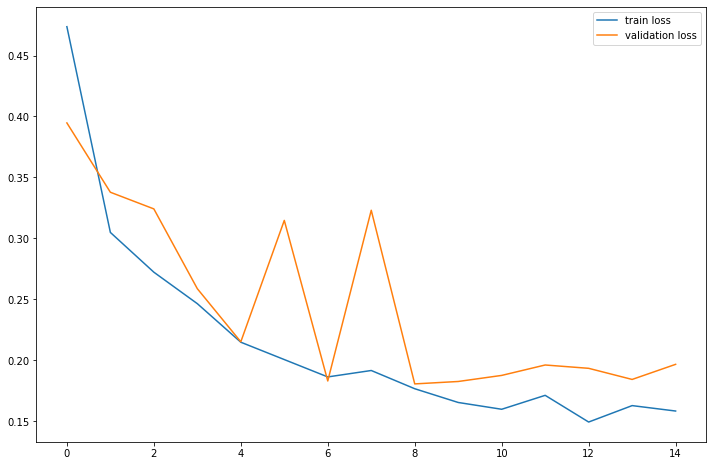

In [12]:
plt.figure(figsize=(12,8))
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='validation loss')
plt.legend();

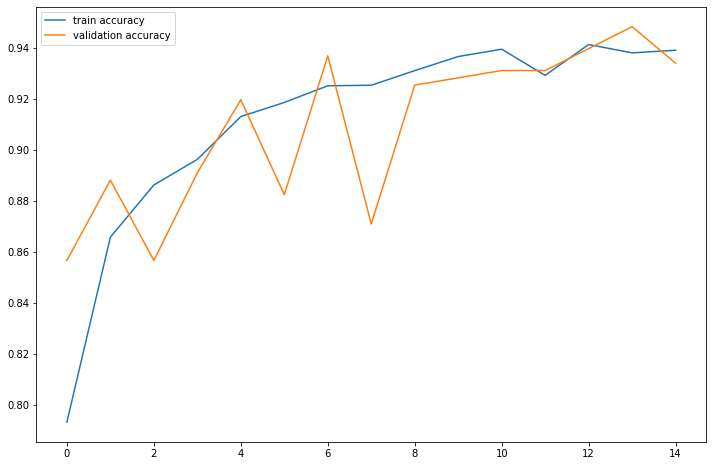

In [13]:
plt.figure(figsize=(12,8))
plt.plot(r.history['accuracy'],label='train accuracy')
plt.plot(r.history['val_accuracy'],label='validation accuracy')
plt.legend();

In [14]:
test_predictions = cnn.predict(test_set)
pred = []

for x in test_predictions:
    if x > 0.5:
        pred.append(1)
    else:
        pred.append(0)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


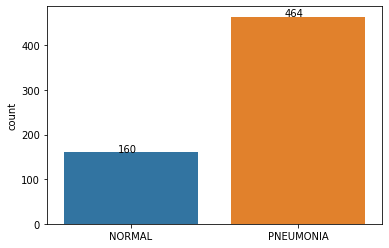

In [15]:
ax = sns.countplot(pred)
ax.set_xticklabels(['NORMAL','PNEUMONIA'])
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.32, p.get_height()+1));

Therefore, on the test set, there are a total of 438 pneumonia cases.